In [ ]:
from IPython.display import display, HTML

!python producer_yellow.py > output.txt 2>&1
with open('output.txt') as f:
    display(HTML(f'''
    <div style="max-height:300px; overflow-y:false; border:1px solid #ccc; padding:10px;">
    <pre>{f.read()}</pre>
    </div>
    '''))

In [ ]:
!python consumer.py > output_consumer.txt 2>&1
with open('output_consumer.txt') as f:
    display(HTML(f'''
    <div style="max-height:300px; overflow-y:false; border:1px solid #ccc; padding:10px;">
    <pre>{f.read()}</pre>
    </div>
    '''))

In [3]:
!python stream_processor.py

Starting stats processor with borough tracking and clustering...
^C


,location_id,count,mean_distance,mean_fare,std_distance,std_fare,cluster_id
0,132,100,15.93,45.68,5.63,13.58,1
1,186,100,1.92,10.48,1.26,4.92,2
2,138,100,9.93,32.12,3.32,9.68,1
3,79,100,2.39,10.34,2.69,7.14,2
4,249,100,2.18,10.01,1.61,5.16,2


,borough,count,mean_distance,mean_fare,std_distance,std_fare
0,Queens,100,11.16,34.62,6.38,15.02
1,Manhattan,100,2.23,10.78,2.88,8.75
2,Brooklyn,100,4.32,23.29,4.56,15.02
3,Unknown,100,3.15,13.05,3.81,11.16
4,Bronx,58,3.72,28.62,6.76,19.56


,location_id,count,mean_distance,mean_fare,std_distance,std_fare,cluster_id
0,132,100,15.93,45.68,5.63,13.58,1
1,186,100,1.92,10.48,1.26,4.92,2
2,138,100,9.93,32.12,3.32,9.68,1
3,79,100,2.39,10.34,2.69,7.14,2
4,249,100,2.18,10.01,1.61,5.16,2


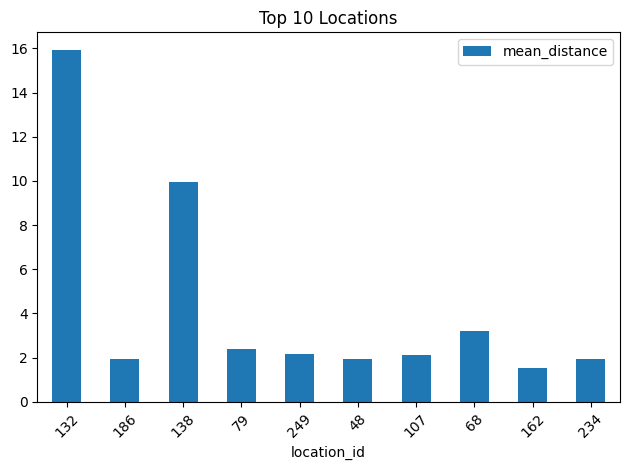

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Rolling stats with clustering
df_roll = pd.read_csv("rolling_stats_with_clusters.csv")
display(df_roll.head())

# Borough stats
df_borough = pd.read_csv("borough_stats.csv")
display(df_borough.head())

# Top 10 pickup locations
df_top10 = pd.read_csv("top_10_locations.csv")
display(df_top10.head())

# Example: Top 10 bar chart
df_top10.plot(kind='bar', x='location_id', y='mean_distance', title='Top 10 Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

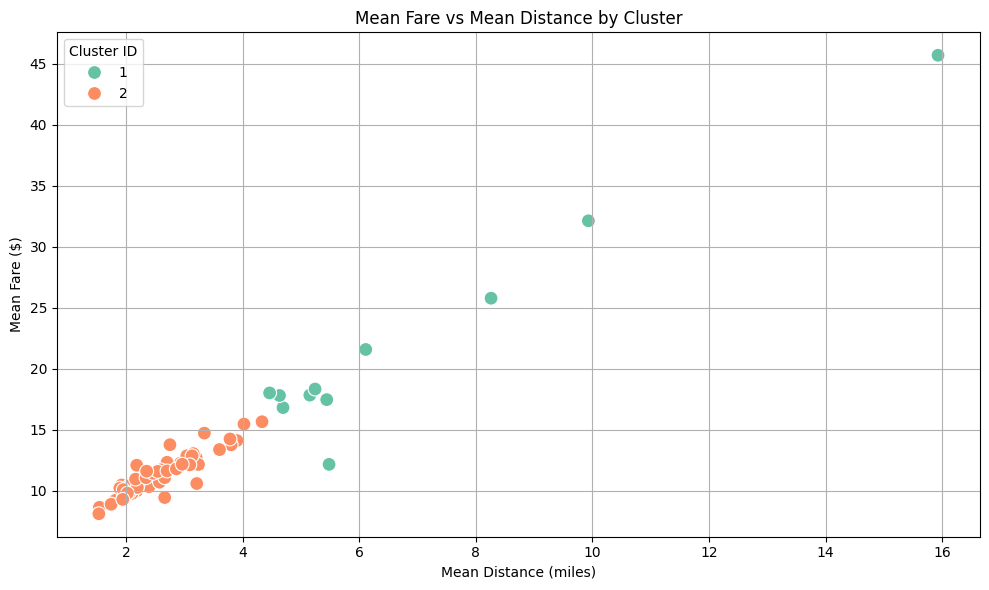

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_roll, x='mean_distance', y='mean_fare', hue='cluster_id', palette='Set2', s=100)
plt.title("Mean Fare vs Mean Distance by Cluster")
plt.xlabel("Mean Distance (miles)")
plt.ylabel("Mean Fare ($)")
plt.grid(True)
plt.legend(title='Cluster ID')
plt.tight_layout()
plt.show()


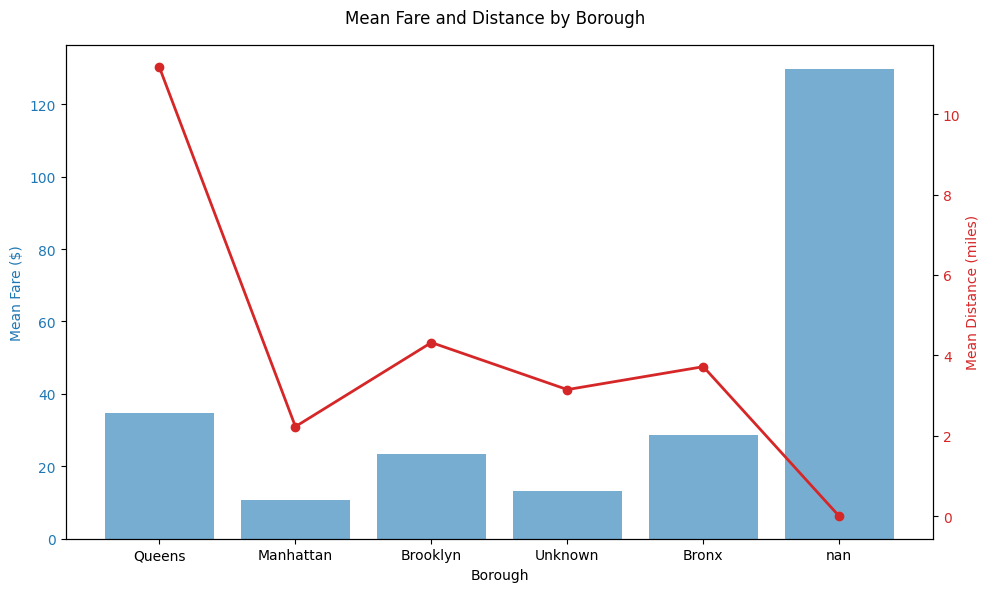

In [8]:
# Ensure borough is string
df_borough['borough'] = df_borough['borough'].astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Borough')
ax1.set_ylabel('Mean Fare ($)', color=color)
ax1.bar(df_borough['borough'], df_borough['mean_fare'], color=color, alpha=0.6, label='Mean Fare')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Distance (miles)', color=color)
ax2.plot(df_borough['borough'], df_borough['mean_distance'], color=color, marker='o', linewidth=2, label='Mean Distance')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle("Mean Fare and Distance by Borough")
fig.tight_layout()
plt.show()


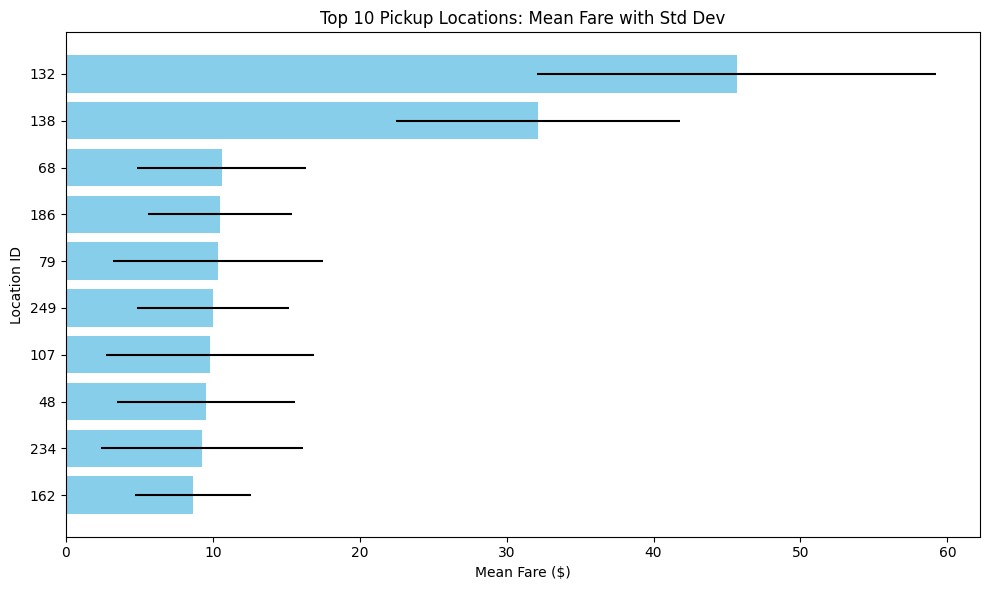

In [6]:
df_top10_sorted = df_top10.sort_values(by='mean_fare', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(df_top10_sorted['location_id'].astype(str), df_top10_sorted['mean_fare'], xerr=df_top10_sorted['std_fare'], color='skyblue')
plt.xlabel("Mean Fare ($)")
plt.ylabel("Location ID")
plt.title("Top 10 Pickup Locations: Mean Fare with Std Dev")
plt.tight_layout()
plt.show()


/var/folders/xm/7ykmt1mj54367qwg67sfh6n80000gn/T/ipykernel_78960/688790569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_roll, x='cluster_id', y='mean_fare', palette='Pastel1')


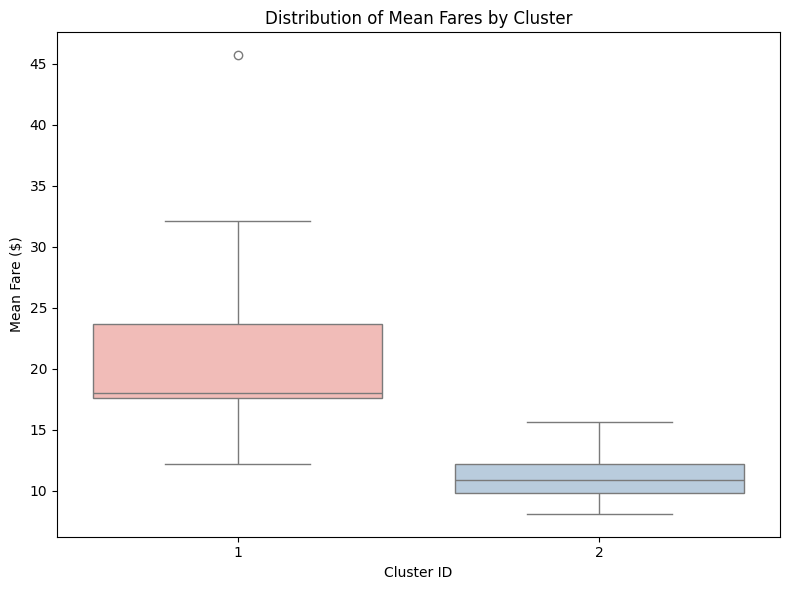

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_roll, x='cluster_id', y='mean_fare', palette='Pastel1')
plt.title("Distribution of Mean Fares by Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Mean Fare ($)")
plt.tight_layout()
plt.show()
